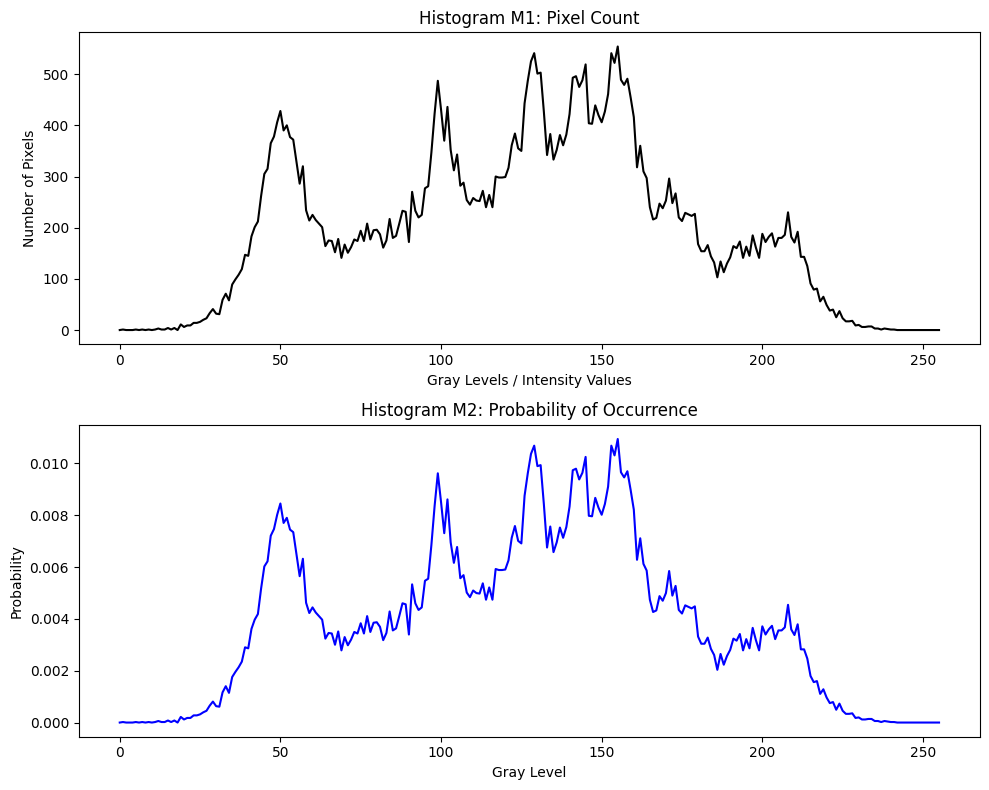

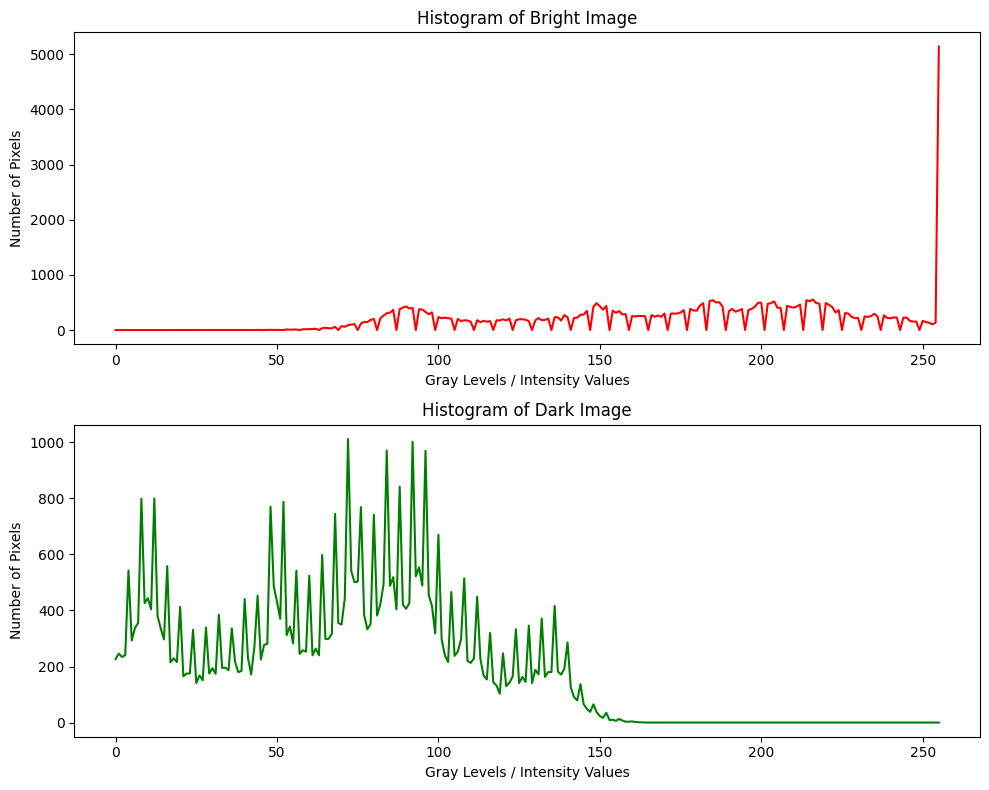

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



image_path = "/content/cv.jpeg"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



hist_values, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])
prob_hist_values = hist_values / hist_values.sum()  # Probability of occurrence

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(bins[:-1], hist_values, color='black')
axs[0].set_title("Histogram M1: Pixel Count")
axs[0].set_xlabel("Gray Levels / Intensity Values")
axs[0].set_ylabel("Number of Pixels")

axs[1].plot(bins[:-1], prob_hist_values, color='blue')
axs[1].set_title("Histogram M2: Probability of Occurrence")
axs[1].set_xlabel("Gray Level")
axs[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()


bright_image = cv2.convertScaleAbs(gray_image, alpha=1.2, beta=30)  # Increase contrast and brightness
dark_image = cv2.convertScaleAbs(gray_image, alpha=0.8, beta=-30)   # Decrease contrast and brightness

hist_bright, _ = np.histogram(bright_image.flatten(), bins=256, range=[0, 256])
hist_dark, _ = np.histogram(dark_image.flatten(), bins=256, range=[0, 256])

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(hist_bright, color='red')
axs[0].set_title("Histogram of Bright Image")
axs[0].set_xlabel("Gray Levels / Intensity Values")
axs[0].set_ylabel("Number of Pixels")

axs[1].plot(hist_dark, color='green')
axs[1].set_title("Histogram of Dark Image")
axs[1].set_xlabel("Gray Levels / Intensity Values")
axs[1].set_ylabel("Number of Pixels")

plt.tight_layout()
plt.show()




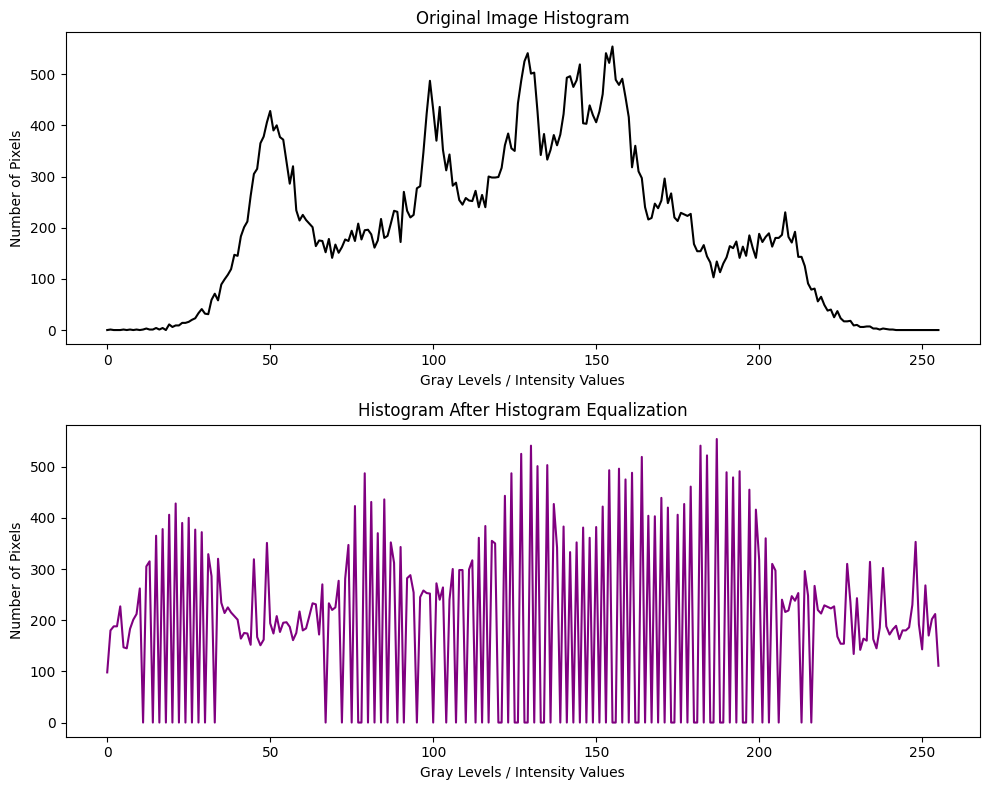

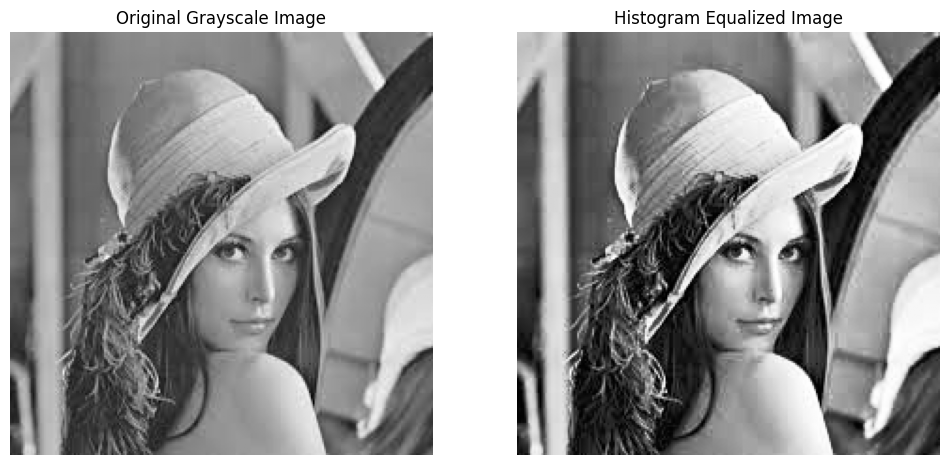

In [2]:

equalized_image = cv2.equalizeHist(gray_image)

hist_equalized, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(hist_values, color='black')
axs[0].set_title("Original Image Histogram")
axs[0].set_xlabel("Gray Levels / Intensity Values")
axs[0].set_ylabel("Number of Pixels")

axs[1].plot(hist_equalized, color='purple')
axs[1].set_title("Histogram After Histogram Equalization")
axs[1].set_xlabel("Gray Levels / Intensity Values")
axs[1].set_ylabel("Number of Pixels")

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis("off")

ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title("Histogram Equalized Image")
ax[1].axis("off")

plt.show()


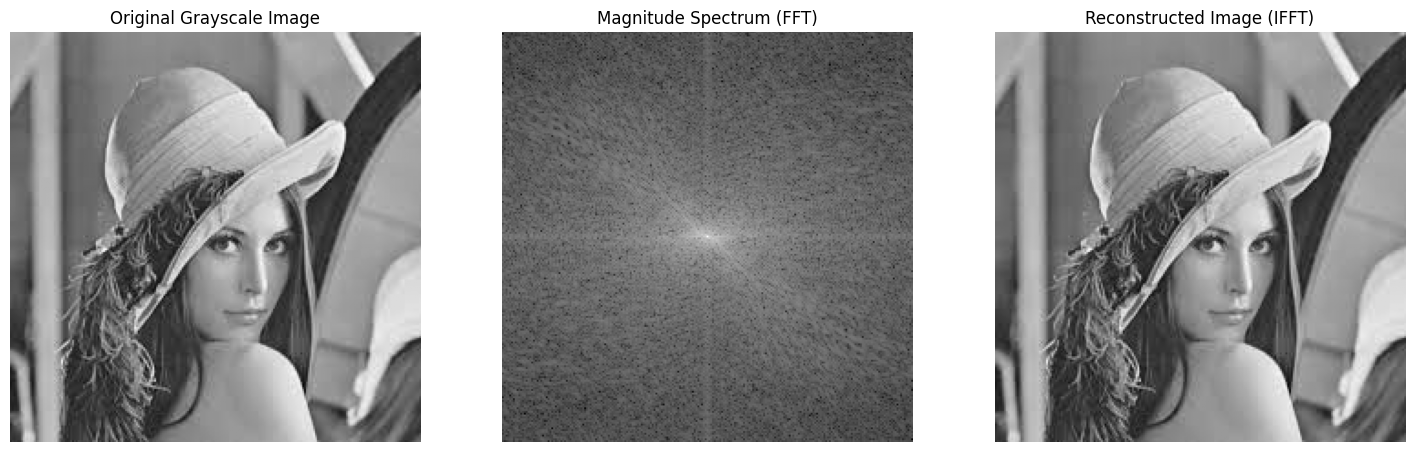

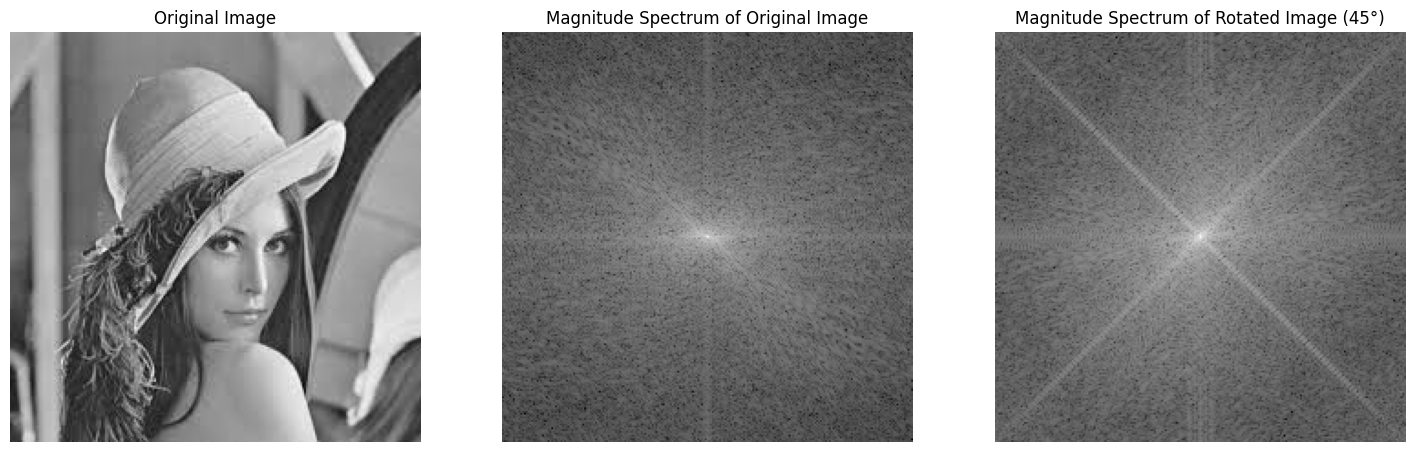

In [3]:

fft_image = np.fft.fft2(gray_image)
fft_shift = np.fft.fftshift(fft_image)
magnitude_spectrum = np.log1p(np.abs(fft_shift))

ifft_shift = np.fft.ifftshift(fft_shift)
reconstructed_image = np.fft.ifft2(ifft_shift)
reconstructed_image = np.abs(reconstructed_image)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis("off")

ax[1].imshow(magnitude_spectrum, cmap='gray')
ax[1].set_title("Magnitude Spectrum (FFT)")
ax[1].axis("off")

ax[2].imshow(reconstructed_image, cmap='gray')
ax[2].set_title("Reconstructed Image (IFFT)")
ax[2].axis("off")

plt.show()


center = (gray_image.shape[1] // 2, gray_image.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (gray_image.shape[1], gray_image.shape[0]))

fft_rotated = np.fft.fft2(rotated_image)
fft_rotated_shift = np.fft.fftshift(fft_rotated)
magnitude_spectrum_rotated = np.log1p(np.abs(fft_rotated_shift))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(magnitude_spectrum, cmap='gray')
ax[1].set_title("Magnitude Spectrum of Original Image")
ax[1].axis("off")

ax[2].imshow(magnitude_spectrum_rotated, cmap='gray')
ax[2].set_title("Magnitude Spectrum of Rotated Image (45°)")
ax[2].axis("off")

plt.show()
